In [1]:
#Importing the necessary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Titanic dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
#dropping insignificant variables
df = df.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [7]:
# checking for missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Cabin       327
Embarked      0
dtype: int64

In [8]:
# how much percent
df.isnull().sum() / len(df)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Cabin       78.229665
Embarked     0.000000
dtype: float64

In [9]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

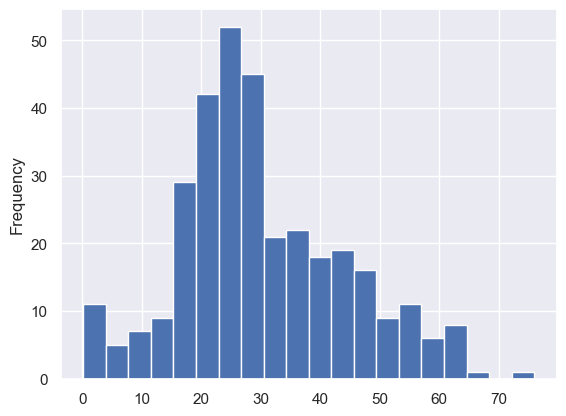

In [10]:
df['Age'].plot(kind='hist', bins=20)

In [11]:
df['Age'].isnull().sum()/len(df['Age'])

0.20574162679425836

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
# Drop variable - Cabin because we have 78% missing data
df = df.drop(['Cabin'], axis=1)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [15]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [17]:
# Encoding part - Sex and Embarked
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [18]:
# label encoder
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

In [19]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [20]:
# One Hot Encoding

df = pd.get_dummies(df, columns = ['Embarked'])

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,34.5,0,0,False,True,False
1,1,3,0,47.0,1,0,False,False,True
2,0,2,1,62.0,0,0,False,True,False
3,0,3,1,27.0,0,0,False,False,True
4,1,3,0,22.0,1,1,False,False,True


In [22]:
# dummy variable
df = df.iloc[:,:-1]

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,0,3,1,34.5,0,0,False,True
1,1,3,0,47.0,1,0,False,False
2,0,2,1,62.0,0,0,False,True
3,0,3,1,27.0,0,0,False,False
4,1,3,0,22.0,1,1,False,False


In [24]:
x = df.iloc[:,1:]
y = df[['Survived']]


In [25]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,3,1,34.5,0,0,False,True
1,3,0,47.0,1,0,False,False
2,2,1,62.0,0,0,False,True
3,3,1,27.0,0,0,False,False
4,3,0,22.0,1,1,False,False


In [26]:
y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [27]:
#Feature scaling with x - Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1= sc.fit_transform(x)
pd.DataFrame(x1)


,0,1,2,3,4,5,6
0,0.873482,0.755929,0.386231,-0.499470,-0.400248,-0.568142,2.843757
1,0.873482,-1.322876,1.371370,0.616992,-0.400248,-0.568142,-0.351647
2,-0.315819,0.755929,2.553537,-0.499470,-0.400248,-0.568142,2.843757
3,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.568142,-0.351647
4,0.873482,-1.322876,-0.598908,0.616992,0.619896,-0.568142,-0.351647
...,...,...,...,...,...,...,...
413,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.568142,-0.351647
414,-1.505120,-1.322876,0.740881,-0.499470,-0.400248,1.760125,-0.351647
415,0.873482,0.755929,0.701476,-0.499470,-0.400248,-0.568142,-0.351647
416,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.568142,-0.351647


In [60]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.25, random_state=1)


In [61]:
#model_building
from sklearn.svm import SVC

In [62]:
svm_linear = SVC(kernel='rbf')
svm_linear.fit(x_train, y_train)
y_pred_train_linear = svm_linear.predict(x_train)
y_pred_test_linear = svm_linear.predict(x_test)

In [63]:
# Evaluation 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [64]:
print("Training Accuracy - Linear :", accuracy_score(y_train, y_pred_train_linear))
print("*************"*5)
print("Test Accuracy - Linear :", accuracy_score(y_test, y_pred_test_linear))

Training Accuracy - Linear : 1.0
*****************************************************************
Test Accuracy - Linear : 0.9904761904761905


In [65]:
from sklearn.linear_model import LogisticRegression
logit_ovr = LogisticRegression()
logit_ovr.fit(x_train, y_train)

LogisticRegression()

In [66]:
y_pred_train_logit = logit_ovr.predict(x_train)
y_pred_test_logit = logit_ovr.predict(x_test)

In [67]:
print("Training Accuracy - logit :", accuracy_score(y_train, y_pred_train_logit))
print("*************"*5)
print("Test Accuracy - Logit :", accuracy_score(y_test, y_pred_test_logit))

Training Accuracy - logit : 1.0
*****************************************************************
Test Accuracy - Logit : 1.0


In [68]:
# cross validation method
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(svm_linear, x_train, y_train, cv=10)
test_accuracy = cross_val_score(svm_linear, x_test, y_test, cv=10)
print("Training accuracy :", train_accuracy)
print("************"*5)
print("Training Mean Accuracy :", train_accuracy.mean())
print("************"*5)
print("Training Max Accuracy :", train_accuracy.max())

Training accuracy : [1.         1.         1.         1.         0.96774194 1.
 0.93548387 1.         1.         1.        ]
************************************************************
Training Mean Accuracy : 0.9903225806451612
************************************************************
Training Max Accuracy : 1.0
